# --------> COFFEE SHOP SALES ANALYSIS  <------------


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv(r'C:\Users\prade\Downloads\coffeeshopsales.csv')

In [4]:
df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,1/1/2023,7:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,1/1/2023,7:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,1/1/2023,7:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,1/1/2023,7:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,1/1/2023,7:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


In [5]:
df.shape

(149116, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   transaction_id    149116 non-null  int64  
 1   transaction_date  149116 non-null  object 
 2   transaction_time  149116 non-null  object 
 3   transaction_qty   149116 non-null  int64  
 4   store_id          149116 non-null  int64  
 5   store_location    149116 non-null  object 
 6   product_id        149116 non-null  int64  
 7   unit_price        149116 non-null  float64
 8   product_category  149116 non-null  object 
 9   product_type      149116 non-null  object 
 10  product_detail    149116 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 12.5+ MB


---------> NO NULL FOUND IN THIS DATA

In [81]:
df['transaction_date']=pd.to_datetime(df['transaction_date'])
df['transaction_time']=pd.to_datetime(df['transaction_time'])

In [70]:
df['transaction_date'].dtype

dtype('<M8[ns]')

In [82]:
df['transaction_time'].dtype

dtype('<M8[ns]')

In [69]:
df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,total_sales,month
0,1,2023-01-01,7:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.0,1
1,2,2023-01-01,7:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2,1
2,3,2023-01-01,7:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,9.0,1
3,4,2023-01-01,7:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.0,1
4,5,2023-01-01,7:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2,1


In [7]:
df[['transaction_qty','unit_price']].describe()

,transaction_qty,unit_price
count,149116.000000,149116.000000
mean,1.438276,3.382219
std,0.542509,2.658723
min,1.000000,0.800000
25%,1.000000,2.500000
50%,1.000000,3.000000
75%,2.000000,3.750000
max,8.000000,45.000000


----------->No high dispersion found in

In [9]:
df.columns

Index(['transaction_id', 'transaction_date', 'transaction_time',
       'transaction_qty', 'store_id', 'store_location', 'product_id',
       'unit_price', 'product_category', 'product_type', 'product_detail'],
      dtype='object')

--------TOTAL SALES

In [17]:
df['total_sales']= df['transaction_qty']*df['unit_price']
df['total_sales'].sum()

698812.3300000002

---------AVG SALES

In [19]:
df['total_sales'].mean()

4.686367190643527

-------TOTAL QUANTITY SOLD

In [20]:
df['transaction_qty'].sum()

214470

------TOTAL ORDERS

In [37]:
df['transaction_id'].count()

149116

## visualisation

### product_category wise sales

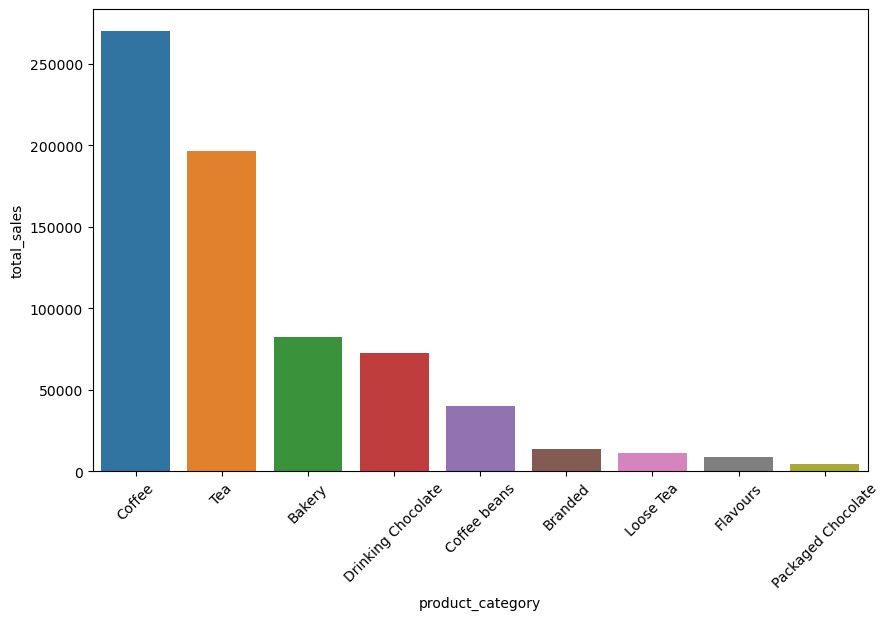

In [42]:
saels_by_product_category=df.groupby(['product_category'],as_index=False)['total_sales'].sum().sort_values(by='total_sales',ascending=False)
plt.figure(figsize=(10, 6)) 
sns.barplot(x='product_category',y='total_sales',data=saels_by_product_category)
plt.xticks(rotation=45) 
plt.show()

In [46]:
sales=df[df['product_category']=='Coffee']['total_sales'].sum()
print("TOTAL SALES OF COFFEE =",sales)

TOTAL SALES OF COFFEE = 269952.44999999995


### product category wise sold quantity 

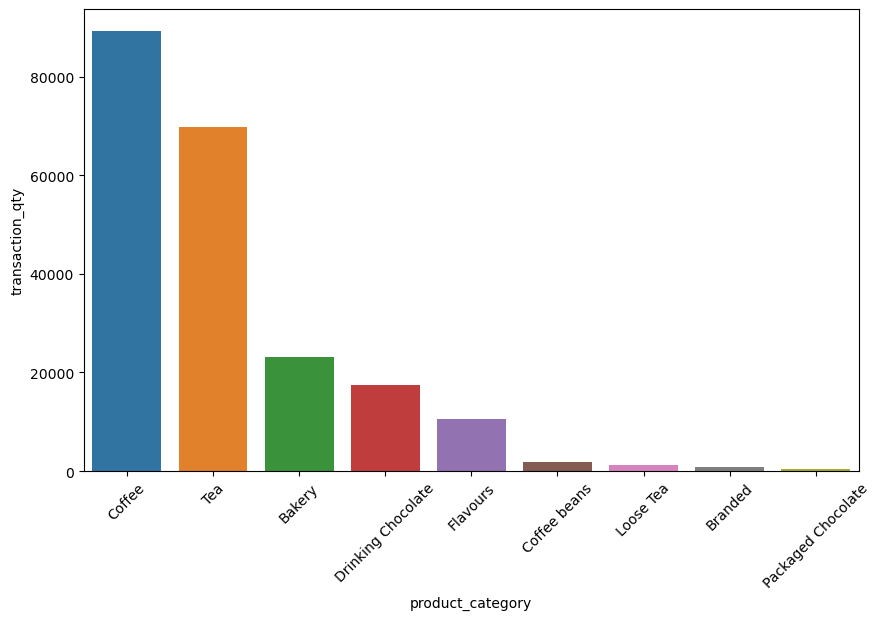

In [44]:
total_qty_by_product_category=df.groupby(['product_category'],as_index=False)['transaction_qty'].sum().sort_values(by='transaction_qty',ascending=False)
plt.figure(figsize=(10, 6)) 
sns.barplot(x='product_category',y= 'transaction_qty',data=total_qty_by_product_category)
plt.xticks(rotation=45) 
plt.show()

In [47]:
quantity =df[df['product_category']=='Coffee']['transaction_qty'].sum()
print("TOTAL QUANTITY OF COFFEE =",quantity)

TOTAL QUANTITY OF COFFEE = 89250


----------->  
From above graphs we can see that most of the sales amount and sold quantity product is coffee


### store location wise sales

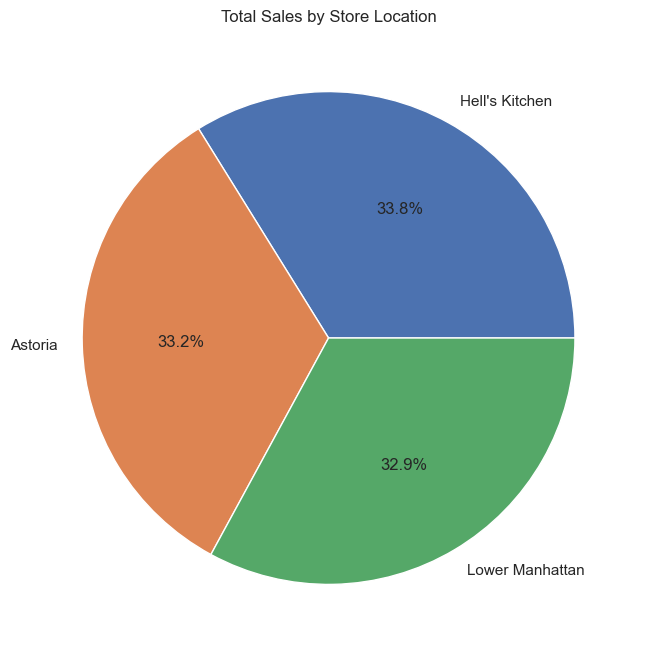

In [95]:
sales_by_location=df.groupby(['store_location'],as_index=False)['total_sales'].sum().sort_values(by='total_sales',ascending=False)
plt.figure(figsize=(8,8))
plt.pie(sales_by_location['total_sales'],labels=sales_by_location['store_location'],autopct='%1.1f%%')
plt.title('Total Sales by Store Location')
plt.show()

In [96]:
df.groupby(['store_location'],as_index=False)['total_sales'].sum().sort_values(by='total_sales',ascending=False)

,store_location,total_sales
1,Hell's Kitchen,236511.17
0,Astoria,232243.91
2,Lower Manhattan,230057.25


---------------> We can see in graph that our highest sales are happening at the hell's kitchen store location.

### month wise sales

In [ ]:
df['month']=df['transaction_date'].dt.month

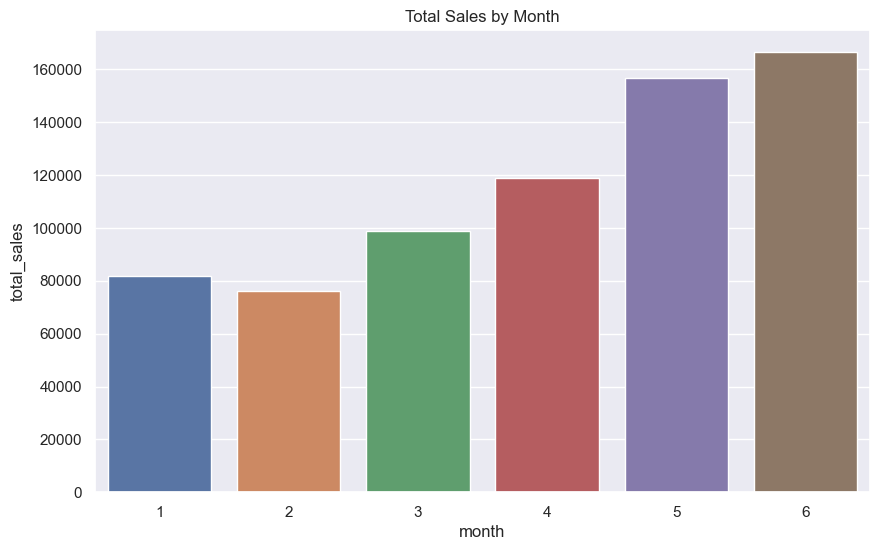

In [80]:
monthly_sales=df.groupby(['month'],as_index=False)['total_sales'].sum().sort_values(by='total_sales',ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x='month',y='total_sales',data=monthly_sales)
plt.title('Total Sales by Month')
plt.show()

In [78]:
df.groupby(['month'],as_index=False)['total_sales'].sum().sort_values(by='total_sales',ascending=False)

,month,total_sales
5,6,166485.88
4,5,156727.76
3,4,118941.08
2,3,98834.68
0,1,81677.74
1,2,76145.19


---------->
From above graphs we can see that most of the sales in -JUN- month

### hour wise sales

In [88]:
df['hour']=df['transaction_time'].dt.hour

In [89]:
df.head(2)

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,total_sales,month,hour
0,1,2023-01-01,2024-05-08 07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.0,1,7
1,2,2023-01-01,2024-05-08 07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2,1,7


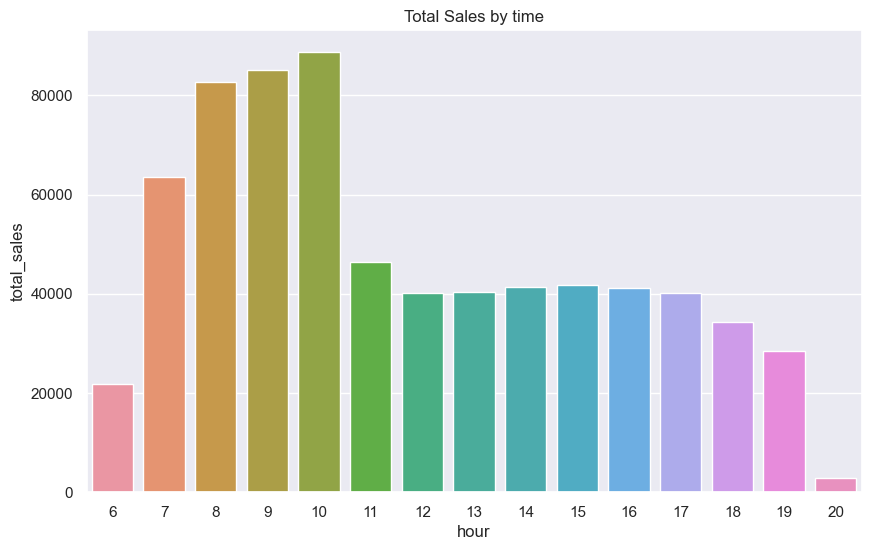

In [91]:
hour_wise_sales=df.groupby(['hour'],as_index=False)['total_sales'].sum().sort_values(by='total_sales',ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x='hour',y='total_sales',data=hour_wise_sales)
plt.title('Total Sales by time')
plt.show()

--------->  We can see in the graph that at 10:00 sales are at their peak. And sales are highest from 7 am to 10:00 am

## Conclusion:-

The conclusion that comes from this is that there is the highest demand for coffee at all three store locations and because coffee has the highest sales amount and the highest quantity of coffee is being sold.
If we look at it from 7:00 AM to 10:00 AM, the maximum sales take place at all the three stores, hence we can take advantage of that time by increasing our staff on time and increase our sales.